In [594]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler

#one hot encoding
from sklearn.preprocessing import OneHotEncoder
#linear regression model
from sklearn.linear_model import LinearRegression
#evalutate multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
# for QQ plot
import scipy.stats as stats
# evaluation on test data
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [595]:
file_path = "\\Users\\eggfr\\Flatiron\\Flatiron_phase2_project\\dsc-phase-2-project\\data\\kc_house_data.csv"
project2_raw_df = pd.read_csv(file_path)

In [596]:
project2_raw_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [597]:
y = project2_raw_df['price']
X= project2_raw_df.drop('price',1)
X.shape

C:\Users\eggfr\AppData\Local\Temp\ipykernel_17432\2521427708.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X= project2_raw_df.drop('price',1)


(21597, 20)

In [598]:
#create train-test set using 75-25 (train-test and random state = 42) randomly split the data
x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size=0.25,random_state=42)
# shape of train and test splits
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16197, 20), (5400, 20), (16197,), (5400,))

In [599]:
project2_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [600]:
project2_raw_df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [601]:
project2_raw_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [602]:
x_train['date'] = pd.to_datetime(x_train['date'])
x_train['month'] = x_train['date'].apply(lambda date:date.month)
x_train['year'] = x_train['date'].apply(lambda date:date.year)
x_train = x_train.drop('date',axis=1)

x_test['date'] = pd.to_datetime(x_test['date'])
x_test['month'] = x_test['date'].apply(lambda date:date.month)
x_test['year'] = x_test['date'].apply(lambda date:date.year)
x_test = x_test.drop('date',axis=1)

#x_test['date'] = pd.to_datetime(x_test['date'])
#x_test['month'] = x_test['date'].apply(lambda date:date.month)
#x_test['year'] = x_test['date'].apply(lambda date:date.year)
#x_test = x_test.drop('date',axis=1)
# Check the new columns
print(x_train.columns.values)

['id' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15'
 'sqft_lot15' 'month' 'year']


In [603]:
project2_raw_df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [604]:
# change the inproper datatype for 'sqft_basement'
x_train['sqft_basement'] = x_train['sqft_basement'].apply(lambda x: float(x.replace("?", "297")))
x_train['sqft_basement'] = x_train['sqft_basement'].apply(lambda x: float(x))
#x_train['sqft_basement'].dtype
x_test['sqft_basement'] = x_test['sqft_basement'].apply(lambda x: float(x.replace("?", "297")))
x_test['sqft_basement'] = x_test['sqft_basement'].apply(lambda x: float(x))



In [605]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5400 entries, 3686 to 2358
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5400 non-null   int64  
 1   bedrooms       5400 non-null   int64  
 2   bathrooms      5400 non-null   float64
 3   sqft_living    5400 non-null   int64  
 4   sqft_lot       5400 non-null   int64  
 5   floors         5400 non-null   float64
 6   waterfront     4780 non-null   object 
 7   view           5386 non-null   object 
 8   condition      5400 non-null   object 
 9   grade          5400 non-null   object 
 10  sqft_above     5400 non-null   int64  
 11  sqft_basement  5400 non-null   float64
 12  yr_built       5400 non-null   int64  
 13  yr_renovated   4437 non-null   float64
 14  zipcode        5400 non-null   int64  
 15  lat            5400 non-null   float64
 16  long           5400 non-null   float64
 17  sqft_living15  5400 non-null   int64  
 18  sqft_

In [606]:
project2_raw_df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [607]:
project2_raw_df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [608]:
#fill na with no value and change yes to 1 n no to 0 #since majority of the sales has no waterfront.
x_train['waterfront'] = x_train['waterfront'].fillna(value = 'NO')
x_train['waterfront'] = x_train['waterfront'].replace(to_replace = ['YES','NO'],value = [1,0])
x_train['waterfront'].value_counts()


0    16086
1      111
Name: waterfront, dtype: int64

In [609]:
x_test['waterfront'] = x_test['waterfront'].fillna(value = 'NO')
x_test['waterfront'] = x_test['waterfront'].replace(to_replace = ['YES','NO'],value = [1,0])
x_test['waterfront'].value_counts()

0    5365
1      35
Name: waterfront, dtype: int64

In [610]:
project2_raw_df['view'].value_counts()
#data1 = x_train["view"].reshape(-1,1)
#encoder = OneHotEncoder(sparse=False)
#onehot = encoder.fit_transform(data1)

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [611]:
# fill na with no value -->majority is none and could be N/A as none as well. n change the catgorical ordinal in to 0 to 4 with 0 to none and 4 to excellent
x_train['view'] = x_train['view'].fillna(value = 'NONE')
x_test['view'] = x_test['view'].fillna(value = 'NONE')
x_train['view'] = x_train['view'].replace(to_replace = ['NONE','AVERAGE','GOOD','FAIR','EXCELLENT'],value = [0,1,2,3,4])
x_test['view'] = x_test['view'].replace(to_replace = ['NONE','AVERAGE','GOOD','FAIR','EXCELLENT'],value = [0,1,2,3,4])

In [612]:
project2_raw_df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [613]:
# replace cateogrical rating with (0 to 5 scale. 0 - Poor, and 4 - Very Good)
x_train['condition'] = x_train['condition'].replace(to_replace = ['Poor','Fair','Average','Good','Very Good'],value = [0,1,2,3,4])
x_test['condition'] = x_test['condition'].replace(to_replace = ['Poor','Fair','Average','Good','Very Good'],value = [0,1,2,3,4])


In [614]:
project2_raw_df['grade'].value_counts

<bound method IndexOpsMixin.value_counts of 0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21592           8 Good
21593           8 Good
21594        7 Average
21595           8 Good
21596        7 Average
Name: grade, Length: 21597, dtype: object>

In [615]:
# grab the numerical rating and assign it to interger type
x_train['new_grade'] = x_train['grade'].astype(str).str[0]
x_train['new_grade'] = x_train['new_grade'].astype(int)
x_test['new_grade'] = x_test['grade'].astype(str).str[0]
x_test['new_grade'] = x_test['new_grade'].astype(int)


In [616]:
#drop the string grade column
x_train = x_train.drop(columns='grade')
x_test = x_test.drop(columns='grade')

In [617]:
project2_raw_df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [618]:
x_train.shape

(16197, 21)

In [619]:
# reduce the outlier bedrooms =33
#x_train = x_train[x_train['bedrooms']<12]
#x_test = x_test[x_test['bedrooms']<12]
#y_train = y_train[x_train['bedrooms']<12 ]

In [620]:
project2_raw_df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [621]:
# reduce the bathroom < 6.5
#x_train = x_train[x_train['bathrooms']<6.5]
#x_test = x_test[x_test['bathrooms']<6.5]
x_train.shape

(16197, 21)

In [622]:
#grouping seattle into zipcode which it solely belongs https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033 
x_train['seattle'] = x_train['zipcode'].apply(lambda x : 0 if x == 98101 or x == 98102 or x == 98103 or x == 98104 or x == 98105 or x == 98106 or x == 98107 or x == 98109 or x == 98111 or x == 98112 or x == 98114 or x == 98116 or x == 98117 or x == 98118 or x == 98119 or x == 98121 or x == 98122 or x == 98124 or x == 98125 or x == 98126 or x == 98131 or x == 98132 or x == 98133 or x == 98134 or x == 98136 or x == 98144 or x == 98145 or x == 98146 or x == 98148 or x == 98154  or x == 98160 or x == 98161 or x == 98164 or x == 98166 or x == 98171 or x == 98174 or x== 98178 or x == 98199 else 1) 
x_test['seattle'] = x_test['zipcode'].apply(lambda x : 0 if x == 98101 or x == 98102 or x == 98103 or x == 98104 or x == 98105 or x == 98106 or x == 98107 or x == 98109 or x == 98111 or x == 98112 or x == 98114 or x == 98116 or x == 98117 or x == 98118 or x == 98119 or x == 98121 or x == 98122 or x == 98124 or x == 98125 or x == 98126 or x == 98131 or x == 98132 or x == 98133 or x == 98134 or x == 98136 or x == 98144 or x == 98145 or x == 98146 or x == 98148 or x == 98154  or x == 98160 or x == 98161 or x == 98164 or x == 98166 or x == 98171 or x == 98174 or x== 98178 or x == 98199 else 1) 


In [623]:
#onehot Econdinf zipcode for x_train
ohe = OneHotEncoder(drop='first')
data =  x_train[['zipcode']]

view_df = pd.DataFrame(ohe.fit_transform(data).toarray(), index = x_train.index) #index = x_train.index to match x_train index for concat later
view_df.columns = ohe.get_feature_names()   #use get_feature_names() to get feature name back after one hot encoding

x_train = pd.concat([x_train,view_df],axis=1)
x_train.shape

C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(16197, 91)

In [624]:
#onehot Econdinf zipcode for x_test
ohe = OneHotEncoder(drop='first')
data =  x_test[['zipcode']]

view_df = pd.DataFrame(ohe.fit_transform(data).toarray(), index = x_test.index) #index = x_train.index to match x_train index for concat later
view_df.columns = ohe.get_feature_names()   #use get_feature_names() to get feature name back after one hot encoding

x_test = pd.concat([x_test,view_df],axis=1)
x_test.shape

C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(5400, 91)

In [625]:
# fillna with 0 to NaN for year_renovated- assuming there is no renovation.
x_train['yr_renovated'] = x_train['yr_renovated'].fillna(value = 0)
x_test['yr_renovated'] = x_test['yr_renovated'].fillna(value = 0)

<AxesSubplot:xlabel='price', ylabel='Density'>

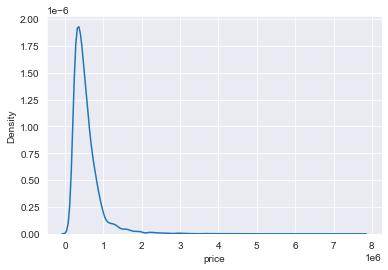

In [626]:
sns.kdeplot(y_train)

In [627]:
#take a log on price

y_train = np.log(y_train)
y_test = np.log(y_test)


<AxesSubplot:xlabel='price', ylabel='Density'>

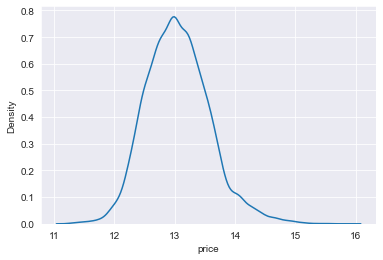

In [628]:
sns.kdeplot(y_train)

In [629]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 91 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     16197 non-null  int64  
 7   view           16197 non-null  int64  
 8   condition      16197 non-null  int64  
 9   sqft_above     16197 non-null  int64  
 10  sqft_basement  16197 non-null  float64
 11  yr_built       16197 non-null  int64  
 12  yr_renovated   16197 non-null  float64
 13  zipcode        16197 non-null  int64  
 14  lat            16197 non-null  float64
 15  long           16197 non-null  float64
 16  sqft_living15  16197 non-null  int64  
 17  sqft_lot15     16197 non-null  int64  
 18  mon

In [630]:
x_train.isnull().sum()

id             0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
              ..
x0_98177       0
x0_98178       0
x0_98188       0
x0_98198       0
x0_98199       0
Length: 91, dtype: int64

In [631]:
#scale data w MinMaxScaler 'sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15 for both train n data set
features = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
autoscaler = MinMaxScaler()

x_train[features] = autoscaler.fit_transform(x_train[features])
x_test[features] = autoscaler.fit_transform(x_test[features])

In [632]:
x_train = x_train.drop(columns=['id','year','zipcode'])
x_test = x_test.drop(columns=['id','year','zipcode'])

In [633]:
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,x0_98146,x0_98148,x0_98155,x0_98166,x0_98168,x0_98177,x0_98178,x0_98188,x0_98198,x0_98199
6405,3,2.50,0.114655,0.002410,2.0,0,0,2,0.167035,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
937,3,2.50,0.125285,0.003661,1.0,0,0,2,0.103982,0.147303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19076,5,4.00,0.330296,0.298645,2.0,0,0,4,0.397124,0.157676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15201,2,2.00,0.080486,0.002035,1.0,0,0,3,0.117257,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13083,3,2.25,0.144267,0.019137,1.0,0,0,3,0.151549,0.109959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [634]:
x_test.shape

(5400, 88)

In [635]:
import statsmodels.api as sm
y = y_train
X= x_train
z = x_test
Hh = y_test
Xcont = sm.add_constant(X)

model = sm.OLS(endog = y, exog = Xcont)
model = sm.OLS(y,Xcont)
res = model.fit()
#testmodel = sm.OLS(z,Hh).fit()
#print(testmodel.summary())
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1203.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:44:33   Log-Likelihood:                 3696.3
No. Observations:               16197   AIC:                            -7217.
Df Residuals:                   16109   BIC:                            -6540.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -66.3703      8.095     -8.199

In [636]:
#lr = LinearRegression()
#lr.fit(x_train,y_train)
ols = LinearRegression()

testsmodel = ols.fit(X,y)
print(testsmodel.score(X,y)) # train
print(testsmodel.score(z,Hh)) # test 
#print(cross_val_score(lr,X,y,cv=3))

0.8666296341435498
0.8250361486400566


In [637]:
print(ols.intercept_)

-69.25598512448943


In [638]:
ols.coef_

array([-9.72394302e-03,  5.00411177e-02,  1.89431294e+00,  1.07412021e+00,
       -3.12450085e-02,  4.70472758e-01,  7.36529504e-02,  5.78275346e-02,
        1.12123202e+00,  6.79991622e-02,  3.78423549e-04,  4.71092700e-05,
        6.05498923e-01, -4.25772636e-01,  7.37640527e-01,  3.23100772e-02,
       -4.86973514e-03,  5.55448820e-03, -4.57770957e-01, -2.45717527e-02,
        2.34665142e-02,  9.48680095e-01,  6.17797189e-01,  5.59708367e-01,
        5.58281745e-01,  5.44660185e-01,  3.08537689e-01,  2.04360662e-01,
        2.49220945e-01,  1.62890975e-01,  2.09334005e-01, -5.86700167e-02,
        4.03210561e-01,  4.72392513e-01,  1.51107699e-01,  5.86187046e-01,
        4.76270094e-02,  4.70318445e-02, -5.83036575e-02,  6.06570593e-01,
        3.23704584e-01,  2.05465710e-01,  1.07967563e+00,  7.51528100e-01,
        7.50012549e-02,  4.42350479e-01,  4.88212600e-01,  4.37720873e-01,
        7.18783154e-02,  2.20931306e-01,  1.29798462e-01,  2.62168908e-01,
        3.81866961e-01,  

In [639]:
model1_predictions = ols.predict(x_test)

In [640]:
model1_predictions

array([12.26145716, 13.15063008, 12.87243603, ..., 14.31865894,
       13.9704357 , 12.33347881])

In [641]:
ols.score(x_test,y_test)

0.8250361486400566

In [642]:
model1_predictions.shape


(5400,)

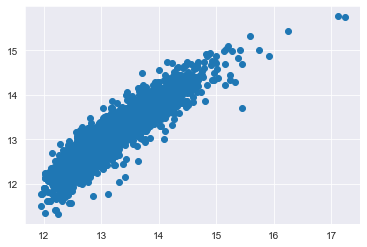

In [643]:
plt.scatter(model1_predictions, y_test)

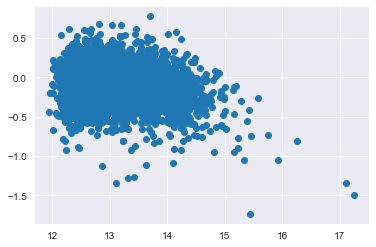

In [644]:
plt.scatter(model1_predictions,(y_test-model1_predictions))

C:\Users\eggfr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

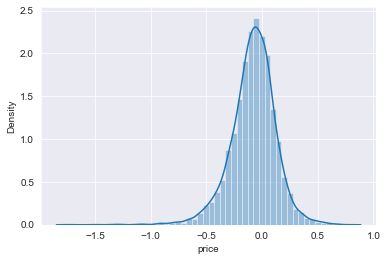

In [645]:
sns.distplot((y_test-model1_predictions))

In [646]:
metrics.mean_absolute_error(y_test,model1_predictions)

0.16109112693732267

In [647]:
metrics.mean_squared_error(y_test,model1_predictions)

0.04804073278073668

In [648]:
np.sqrt(mean_squared_error(y_test,model1_predictions))

0.2191819627175938

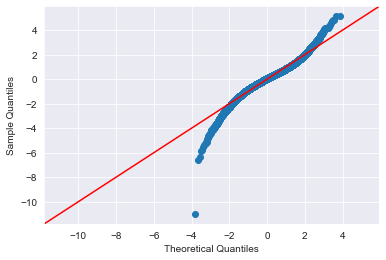

In [649]:
fig = sm.graphics.qqplot(res.resid, dist=stats.norm, line='45', fit=True)

In [650]:
#plt.scatter(model.predict(train[x_cols]), model.resid)
#plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

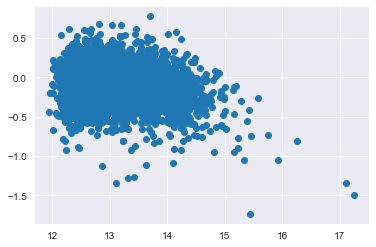

In [651]:
plt.scatter(model1_predictions,(y_test-model1_predictions))

In [652]:
#plt.scatter(res.predict(x_train), res.resid)
#plt.plot(res.predict(x_train), [0 for i in range(len(train))])

In [653]:
x_train_list= list(x_train.columns.values)
print(x_train_list)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'new_grade', 'seattle', 'x0_98002', 'x0_98003', 'x0_98004', 'x0_98005', 'x0_98006', 'x0_98007', 'x0_98008', 'x0_98010', 'x0_98011', 'x0_98014', 'x0_98019', 'x0_98022', 'x0_98023', 'x0_98024', 'x0_98027', 'x0_98028', 'x0_98029', 'x0_98030', 'x0_98031', 'x0_98032', 'x0_98033', 'x0_98034', 'x0_98038', 'x0_98039', 'x0_98040', 'x0_98042', 'x0_98045', 'x0_98052', 'x0_98053', 'x0_98055', 'x0_98056', 'x0_98058', 'x0_98059', 'x0_98065', 'x0_98070', 'x0_98072', 'x0_98074', 'x0_98075', 'x0_98077', 'x0_98092', 'x0_98102', 'x0_98103', 'x0_98105', 'x0_98106', 'x0_98107', 'x0_98108', 'x0_98109', 'x0_98112', 'x0_98115', 'x0_98116', 'x0_98117', 'x0_98118', 'x0_98119', 'x0_98122', 'x0_98125', 'x0_98126', 'x0_98133', 'x0_98136', 'x0_98144', 'x0_98146', 'x0_98148', 'x0_98155', 'x0_98166', 'x0_9816

In [654]:
#perform vif_test
feature = x_train_list
X = x_train[feature]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_list = list(zip(feature, vif))
print(vif)

[1.770619497127088, 3.4639038658360635, 221.31481153053068, 2.070785442571235, 2.4758898335355024, 1.2509762837880845, 1.4839313065249025, 1.3131111654507046, 180.2283854888236, 50.37639939828327, 2.767679953514513, 1.1376877171621183, 63.88661991193275, 33.61583684427348, 3.110189183068628, 2.2463979016002606, 1.006950694078556, 1.2025010278832222, 21089662.863478556, 1.579479359842992, 1.7887938331765147, 6.481424811584746, 4.0521231084626095, 7.534653913977656, 3.5669133084076603, 6.61017296231003, 1.9338847847913445, 7.586865721254229, 6.397954790624942, 8.470979410880776, 3.175912664509184, 2.735491775580796, 3.048696849294018, 7.06239272622129, 10.46015572578633, 7.04350985146906, 1.9242313957847483, 2.3289855254731178, 1.4027780879829306, 11.279059899621732, 17.02039804620869, 5.491990642351125, 2.0080950866772236, 4.683904705922374, 3.7274706468007466, 7.59738700415196, 16.213050707692386, 12.488770114680115, 2.9466868708753844, 4.967628714117075, 4.085591645691739, 5.399965517

In [655]:
vif_scores = list(zip(feature, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))
print((x_cols))

88 36
['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'month', 'new_grade', 'x0_98002', 'x0_98003', 'x0_98005', 'x0_98007', 'x0_98010', 'x0_98022', 'x0_98023', 'x0_98024', 'x0_98030', 'x0_98031', 'x0_98032', 'x0_98039', 'x0_98040', 'x0_98042', 'x0_98055', 'x0_98056', 'x0_98058', 'x0_98070', 'x0_98092', 'x0_98108', 'x0_98168', 'x0_98188', 'x0_98198']


In [656]:
y = y_train
Hh = y_test
feature = x_cols
#feature = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'month', 'new_grade', 'x0_98002', 'x0_98003', 'x0_98005', 'x0_98007', 'x0_98010', 'x0_98022', 'x0_98023', 'x0_98024', 'x0_98030', 'x0_98031', 'x0_98032', 'x0_98039', 'x0_98040', 'x0_98042', 'x0_98055', 'x0_98056', 'x0_98058', 'x0_98070', 'x0_98092', 'x0_98108', 'x0_98168', 'x0_98188', 'x0_98198']
#feature = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'month','seattle']
#feature = ['bedrooms','bathrooms','condition','view']
X= x_train[feature]
z= x_test[feature]
Xcont = sm.add_constant(X)

model = sm.OLS(endog = y, exog = Xcont)
model = sm.OLS(y,Xcont)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     1001.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:44:46   Log-Likelihood:                -3123.8
No. Observations:               16197   AIC:                             6322.
Df Residuals:                   16160   BIC:                             6606.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            18.5795      0.218     85.252

In [657]:
z.shape

(5400, 36)

In [658]:
#lr2 = LinearRegression()
#lr2.fit(x_train,y_train)
ols2 = LinearRegression()
testsmodel = ols2.fit(X,y)
print(testsmodel.score(X,y)) # train
print(testsmodel.score(z,Hh)) # test

0.6904003161146838
0.6617858527333134


In [659]:
print(ols2.intercept_)

18.579516598649597


In [660]:
model2_predictions = ols2.predict(X)

In [661]:
model2_predictions

array([13.19668624, 12.46247926, 13.94268975, ..., 12.8378732 ,
       12.04421236, 13.38492762])

In [662]:
ols2.score(z,Hh)


0.6617858527333134

In [663]:
model2_predictions = ols2.predict(z)

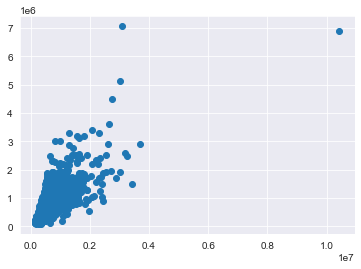

In [664]:
plt.scatter(np.exp(model2_predictions), np.exp(y_test))

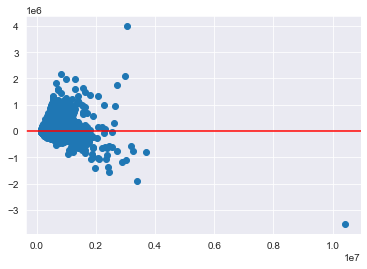

In [665]:
plt.scatter(np.exp(model2_predictions),(np.exp(y_test)-np.exp(model2_predictions)))
plt.axhline(y=0, color='r', linestyle='-')
plt.title("")
plt.show()

C:\Users\eggfr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

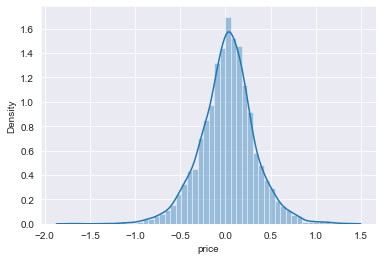

In [666]:
sns.distplot((y_test-model2_predictions))

In [667]:
metrics.mean_absolute_error(y_test,model2_predictions)

0.2296489783279661

In [668]:
metrics.mean_squared_error(y_test,model2_predictions)

0.09286521384395792

In [669]:
np.sqrt(mean_squared_error(y_test,model2_predictions))

0.304737942901697

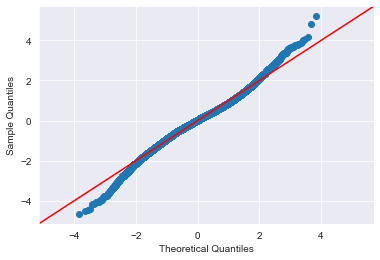

In [670]:
fig = sm.graphics.qqplot(res.resid, dist=stats.norm, line='45', fit=True)

<AxesSubplot:>

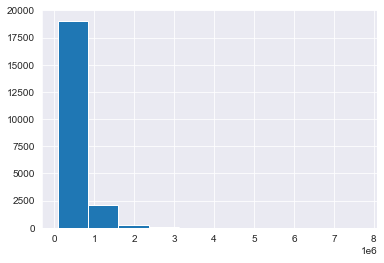

In [671]:
project2_raw_df.price.hist()

In [672]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, project2_raw_df['price'].quantile(q=q)))

0.9 percentile: 887000.0
0.91 percentile: 919993.6
0.92 percentile: 950000.0
0.93 percentile: 997964.0000000001
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0


In [673]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, project2_raw_df['sqft_living'].quantile(q=q)))

0.9 percentile: 3254.0000000000146
0.91 percentile: 3340.0
0.92 percentile: 3420.0
0.93 percentile: 3510.0
0.94 percentile: 3630.0
0.95 percentile: 3760.0
0.96 percentile: 3920.0
0.97 percentile: 4140.0
0.98 percentile: 4410.0


In [674]:
#subset = y_test['price'] < 1600000]
#print(subset)

In [675]:
#subset = project2_raw_df[project2_raw_df['price'] < 1600000]
#print('Percent removed:',(len(project2_raw_df) - len(subset))/len(project2_raw_df))
#outcome = 'price'
#x_cols = ['bedrooms','bathrooms','condition','view']
#predictors = '+'.join(x_cols)
#formula = outcome + '~' + predictors
#model = ols(formula=formula, data=subset).fit()
#model.summary()

In [676]:
rem_project2_raw_df =project2_raw_df
rem_project2_raw_df.shape

(21597, 21)

In [677]:
rem_project2_raw_df = rem_project2_raw_df.loc[rem_project2_raw_df['price']< 1600000]
rem_project2_raw_df = rem_project2_raw_df.loc[rem_project2_raw_df['bathrooms']< 6]
rem_project2_raw_df = rem_project2_raw_df.loc[rem_project2_raw_df['bedrooms']< 11]
rem_project2_raw_df = rem_project2_raw_df.loc[rem_project2_raw_df['sqft_living']< 4410]
rem_project2_raw_df.shape

(20901, 21)